In [ ]:
# update environment
!pip install -r requirements.txt


___
# Automatic Differenciation for Variational Inference 
Lorenzo Brucato, Sam Vallet, Vicky Zeng - *M2 Mathématiques et Intelligence artificielle, Université Paris-Saclay & CentraleSupélec*

___

In [99]:
from functions import *

In [100]:
import numpy as np
import pandas as pd

df = pd.read_csv('Data/train.csv')

In [101]:
df.sample(50000, random_state=42)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
1414161,1399190091620000213,B,NaN,10.0,20000213,1399190091,A,False,"[[-8.607096,41.150286],[-8.607123,41.150214],[..."
1397309,1398928351620000092,C,NaN,NaN,20000092,1398928351,A,False,"[[-8.638533,41.159133],[-8.63856,41.15907],[-8..."
560966,1383056851620000263,B,NaN,9.0,20000263,1383056851,A,False,"[[-8.60652,41.144562],[-8.606934,41.144724],[-..."
1453634,1399758505620000503,B,NaN,13.0,20000503,1399758505,A,False,"[[-8.628246,41.157333],[-8.627733,41.157657],[..."
975156,1390920415620000174,B,NaN,10.0,20000174,1390920415,A,False,"[[-8.607123,41.150331],[-8.607114,41.150295],[..."
...,...,...,...,...,...,...,...,...,...
1268331,1396515320620000541,B,NaN,15.0,20000541,1396515320,A,False,"[[-8.585712,41.148576],[-8.585667,41.148648],[..."
504383,1382048072620000596,B,NaN,9.0,20000596,1382048072,A,False,"[[-8.606448,41.144634],[-8.606781,41.144733],[..."
1667087,1403432054620000681,C,NaN,NaN,20000681,1403432054,A,False,"[[-8.592912,41.162076],[-8.592651,41.162886],[..."
1678873,1403602529620000310,C,NaN,NaN,20000310,1403602529,A,False,"[[-8.595117,41.18148],[-8.594838,41.181408],[-..."


In [102]:
df.describe()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP
count,1.710670e+06,364770.000000,806579.000000,1.710670e+06,1.710670e+06
mean,1.388622e+18,24490.363018,30.272381,2.000035e+07,1.388622e+09
std,9.180944e+15,19624.290043,17.747840,2.112405e+02,9.180944e+06
min,1.372637e+18,2001.000000,1.000000,2.000000e+07,1.372637e+09
25%,1.380731e+18,6593.000000,15.000000,2.000017e+07,1.380731e+09
50%,1.388493e+18,18755.000000,27.000000,2.000034e+07,1.388493e+09
75%,1.396750e+18,40808.000000,49.000000,2.000052e+07,1.396750e+09
max,1.404173e+18,63884.000000,63.000000,2.000098e+07,1.404173e+09


In [103]:
df = df.loc[df['MISSING_DATA'] == False].loc[df['POLYLINE'].apply(lambda x:len(x)) > 2]
df = df.sample(50000, random_state=42)

In [104]:
df = df.reset_index(drop=True)

In [105]:
df

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1376835586620000344,B,NaN,9.0,20000344,1376835586,A,False,"[[-8.606511,41.144715],[-8.606529,41.144679],[..."
1,1400167598620000446,A,40779.0,NaN,20000446,1400167598,A,False,"[[-8.622639,41.160924],[-8.622603,41.161041],[..."
2,1400623382620000571,A,47259.0,NaN,20000571,1400623382,A,False,"[[-8.604729,41.181156],[-8.605098,41.180364],[..."
3,1377698417620000547,B,NaN,10.0,20000547,1377698417,A,False,"[[-8.606943,41.15025],[-8.606925,41.150259],[-..."
4,1376130253620000308,C,NaN,NaN,20000308,1376130253,A,False,"[[-8.640972,41.164236],[-8.639361,41.162931],[..."
...,...,...,...,...,...,...,...,...,...
49995,1380174692620000190,B,NaN,9.0,20000190,1380174692,A,False,"[[-8.606367,41.144877],[-8.60715,41.14503],[-8..."
49996,1379219097620000557,C,NaN,NaN,20000557,1379219097,A,False,"[[-8.613621,41.146911],[-8.613585,41.146443],[..."
49997,1403399534620000173,B,NaN,54.0,20000173,1403399534,A,False,"[[-8.630154,41.157351],[-8.629587,41.157054],[..."
49998,1387606662620000166,B,NaN,46.0,20000166,1387606662,A,False,"[[-8.648901,41.178663],[-8.649189,41.178591],[..."


In [106]:
df = df['POLYLINE']

In [107]:
df

0        [[-8.606511,41.144715],[-8.606529,41.144679],[...
1        [[-8.622639,41.160924],[-8.622603,41.161041],[...
2        [[-8.604729,41.181156],[-8.605098,41.180364],[...
3        [[-8.606943,41.15025],[-8.606925,41.150259],[-...
4        [[-8.640972,41.164236],[-8.639361,41.162931],[...
                               ...                        
49995    [[-8.606367,41.144877],[-8.60715,41.14503],[-8...
49996    [[-8.613621,41.146911],[-8.613585,41.146443],[...
49997    [[-8.630154,41.157351],[-8.629587,41.157054],[...
49998    [[-8.648901,41.178663],[-8.649189,41.178591],[...
49999    [[-8.612415,41.14602],[-8.611974,41.146011],[-...
Name: POLYLINE, Length: 50000, dtype: object

In [108]:
import matplotlib.pyplot as plt

df = df.apply(eval)

(-8.725, -8.5)

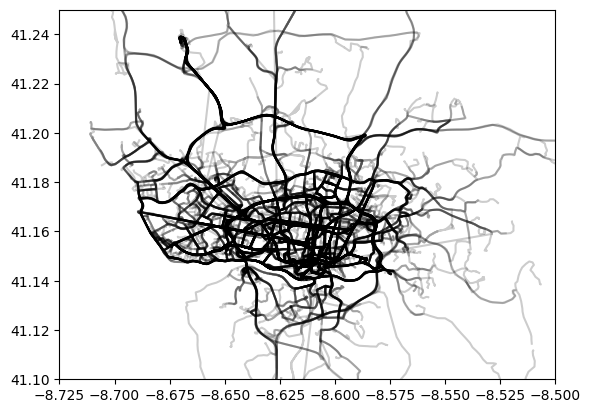

In [133]:

for i in range(2000):
    x, y = np.array(df[i]).T
    plt.plot(x, y, color='black', alpha=0.2)


plt.ylim(41.1, 41.25)
plt.xlim(-8.725, -8.5)


In [135]:
df.to_csv('Data/sample50000.csv', index=False)

In [134]:
df

0        [[-8.606511, 41.144715], [-8.606529, 41.144679...
1        [[-8.622639, 41.160924], [-8.622603, 41.161041...
2        [[-8.604729, 41.181156], [-8.605098, 41.180364...
3        [[-8.606943, 41.15025], [-8.606925, 41.150259]...
4        [[-8.640972, 41.164236], [-8.639361, 41.162931...
                               ...                        
49995    [[-8.606367, 41.144877], [-8.60715, 41.14503],...
49996    [[-8.613621, 41.146911], [-8.613585, 41.146443...
49997    [[-8.630154, 41.157351], [-8.629587, 41.157054...
49998    [[-8.648901, 41.178663], [-8.649189, 41.178591...
49999    [[-8.612415, 41.14602], [-8.611974, 41.146011]...
Name: POLYLINE, Length: 50000, dtype: object